# PH3022-Machine Learning and Neural Computation-Assignment_09

# Q1

# Q1.a

In [5]:
from PIL import Image

img = Image.open("bird.jpg")
width, height = img.size

print("Image width:", width)
print("Image height:", height)
print("Image size (width × height):", width, "×", height)

Image width: 1024
Image height: 1024
Image size (width × height): 1024 × 1024


# Q1.b

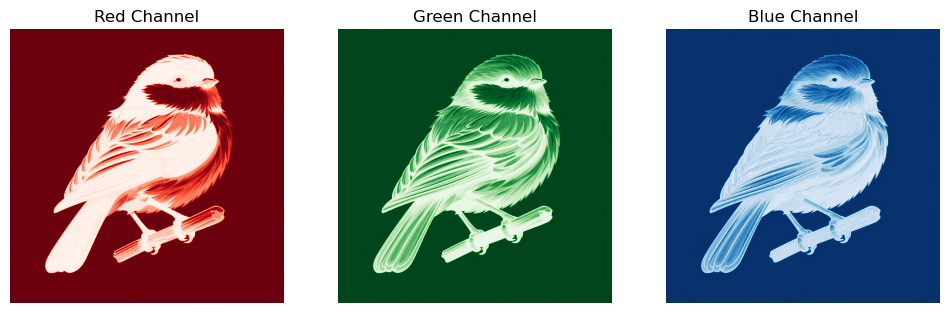

In [6]:
import matplotlib.pyplot as plt
import numpy as np

img_array = np.array(img)

red_channel = img_array[:, :, 0]
green_channel = img_array[:, :, 1]
blue_channel = img_array[:, :, 2]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='Reds')
plt.title("Red Channel")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='Greens')
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='Blues')
plt.title("Blue Channel")
plt.axis("off")

plt.show()

- Each channel represents the intensity of Red, Green, or Blue light at each pixel.
- Bright areas in a channel indicate strong presence of that color.
- Dark areas indicate low intensity of that color.
- Objects in the image appear differently in each channel depending on their color composition.
- For example, green vegetation appears brighter in the green channel, while sky regions may appear brighter in the blue channel.

# Q1.c

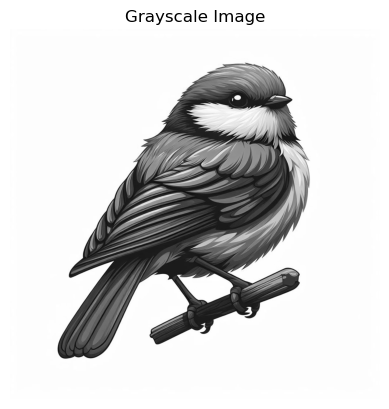

In [7]:
gray_img = img.convert("L")

plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Q2

# Q2.a

- Padding is the process of adding extra pixels (usually zeros) around the border of an input image or feature map before applying a convolution.
- Purpose of padding:
  - Prevents loss of information at the image boundaries
  - Controls the spatial size of the output feature map
  - Allows deeper CNNs without the image size shrinking too quickly
- Common types of padding:
  - Zero padding: adds pixels with value 0
  - Valid padding: no padding is added
  - Same padding: output size is the same as input size
- Example: A 5 × 5 image convolved with a 3 × 3 filter
  - Without padding: output size = 3 × 3
  - With padding = 1: output size = 5 × 5

# Q2.b

- Stride is the number of pixels by which the convolution filter moves across the input image.
- Effect of stride:
  - Stride = 1: the filter moves one pixel at a time, producing a high-resolution output
  - Stride > 1: reduces the output size, resulting in a downsampling effect
- Importance of stride:
  - Controls the spatial resolution of the output feature map
  - Larger stride reduces computational cost but may lose fine details
- Example: Input size: 7 × 7, Filter size: 3 × 3, Stride = 2
  - Output size becomes smaller compared to stride = 1

# Q2.c

- Pooling is a downsampling operation used to reduce the spatial dimensions of feature maps while retaining important information.
- Purpose of pooling:
  - Reduces computational complexity
  - Makes the network more robust to small translations
  - Helps prevent overfitting
- Common types of pooling:
  - Max pooling: selects the maximum value in each pooling window
  - Average pooling: computes the average value
  - Global pooling: pools over the entire feature map
- Example:
  - For a 2 × 2 max pooling window, the maximum value in the window is selected as the output.

# Q3

# Q3.a

Padding
- Padding is applied in convolutional layers using the padding argument in Conv2D. 
- It is usually set to "same" or "valid". 
- Padding adds extra pixels (usually zeros) around the input image to preserve edge information and control the output size after convolution.

In [ ]:
tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    padding='same',
    activation='relu'
)

Stride
- Stride is set using the strides parameter in Conv2D.
- It defines how far the filter moves at each step.
- In the code, stride is typically (1,1), meaning the filter moves one pixel at a time horizontally and vertically.

In [ ]:
strides=(1,1)

Pooling
- Pooling is applied after convolution using a pooling layer.
- The code mainly uses Max Pooling.
- Pooling reduces the spatial size of feature maps and lowers computation cost.

In [ ]:
tf.keras.layers.MaxPooling2D(pool_size=(2,2))

# Q3.b

<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr>
      <th>Parameter</th>
      <th>Value</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Padding</td>
      <td>"same" or "valid"</td>
    </tr>
    <tr>
      <td>Stride</td>
      <td>(1,1)</td>
    </tr>
    <tr>
      <td>Pooling type</td>
      <td>Max pooling</td>
    </tr>
    <tr>
      <td>Pool size</td>
      <td>(2,2)</td>
    </tr>
  </tbody>
</table>


# Q3.c

Given parameters
- Padding = 2
- Stride = (1, 2) → horizontal = 1, vertical = 2
- Pooling = Average pooling
- Pool size = 3 × 3

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN architecture
model = models.Sequential()

# Padding = 2
model.add(layers.ZeroPadding2D(padding=2, input_shape=(28, 28, 1)))

# Convolution layer with stride (vertical=2, horizontal=1)
model.add(layers.Conv2D(
    32,
    (3, 3),
    strides=(2, 1),
    activation='relu'
))

# Average Pooling with pool size 3x3
model.add(layers.AveragePooling2D(pool_size=(3, 3)))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=64,
    validation_data=(test_images, test_labels)
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.8824 - loss: 0.4175 - val_accuracy: 0.9482 - val_loss: 0.1836
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9562 - loss: 0.1515 - val_accuracy: 0.9684 - val_loss: 0.1092
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9685 - loss: 0.1069 - val_accuracy: 0.9760 - val_loss: 0.0840
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9738 - loss: 0.0858 - val_accuracy: 0.9764 - val_loss: 0.0780
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9776 - loss: 0.0739 - val_accuracy: 0.9794 - val_loss: 0.0655
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9794 - loss: 0.0655
Test Accuracy: 97.94%


# Q3.d

SoftMax activation
- MNIST is a multi-class classification problem (digits 0–9).
- SoftMax converts raw outputs into probability values that sum to 1.
- Each output neuron represents the probability of a digit class.
Cross-entropy loss
- Cross-entropy measures the difference between:
  - True class distribution
  - Predicted probability distribution
- It is the most suitable loss function for multi-class classification with SoftMax.

# Q3.e

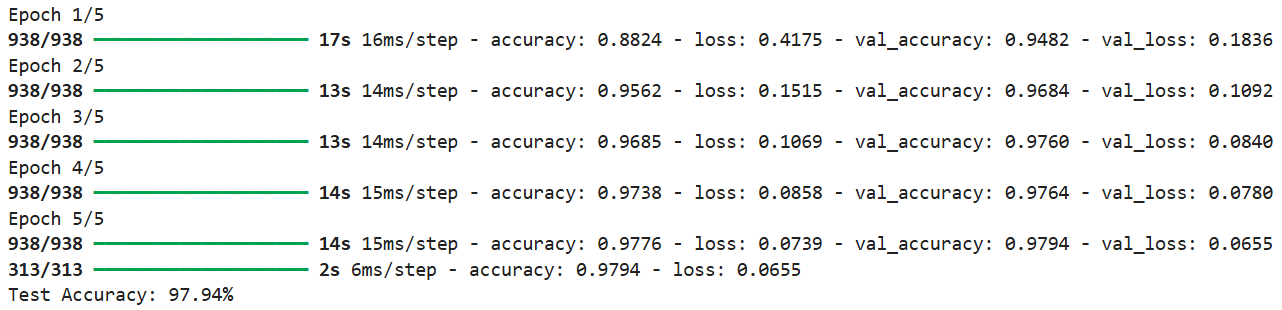

# Q3.f

Final Test Accuracy = 97.94%

# Q4

# Q4.a

- The CIFAR-10 (Canadian Institute For Advanced Research) dataset is a standard benchmark collection used for machine learning and computer vision.
- It consists of 60,000 color images divided into 10 classes, with 6,000 images per class.
- The dataset is pre-split into 50,000 training images and 10,000 test images.
- The 10 categories include: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.

# Q4.b

Each image in the CIFAR-10 dataset has a pixel size of $32 \times 32$. Since they are color images, they have 3 color channels (RGB), making the full shape of each image $32 \times 32 \times 3$.

# Q4.c

Normalization is typically done by scaling the pixel values (which range from 0 to 255) to a range between 0 and 1 by dividing by 255.0.

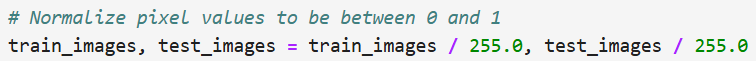

# Q4.d

Yes, the cross-entropy loss function is highly suitable and commonly used for the CIFAR-10 dataset. Because this is a multi-class classification problem (10 classes), we typically use:
- categorical_crossentropy: If labels are one-hot encoded.
- sparse_categorical_crossentropy: If labels are integers (which they are by default when loaded from Keras).

# Q4.e

Key hyperparameters to tune for this model:
- Learning Rate: Determines the step size at each iteration while moving toward a minimum of a loss function.
- Number of Convolutional Layers and Filters: To control the complexity of patterns the model can detect.
- Kernel Size: The dimensions of the sliding window (e.g., $3 \times 3$).
- Batch Size: The number of training examples utilized in one iteration.
- Dropout Rate: To prevent overfitting by randomly setting input units to 0 during training.
- Activation Functions: Such as ReLU for hidden layers or Softmax for the output layer.
- Optimizer Type: Such as Adam, SGD, or RMSprop.

# Q4.f

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, 
          validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nFinal Test accuracy: {test_acc:.4f}')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.4186 - loss: 1.5843 - val_accuracy: 0.5500 - val_loss: 1.2614
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.5661 - loss: 1.2236 - val_accuracy: 0.6082 - val_loss: 1.0836
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6237 - loss: 1.0650 - val_accuracy: 0.6541 - val_loss: 0.9840
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.6623 - loss: 0.9598 - val_accuracy: 0.6882 - val_loss: 0.8963
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6897 - loss: 0.8824 - val_accuracy: 0.6908 - val_loss: 0.8885
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7103 - loss: 0.8233 - val_accuracy: 0.6946 - val_loss: 0.8747
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.7289 - loss: 0.7753 - val_accuracy: 0.7059 - val_loss: 0.8679
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7418 -